<a href="https://colab.research.google.com/github/tlcuzick/data-science-projects/blob/main/predicting-bike-rentals/predicting_bike_rentals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

%matplotlib inline

In [2]:
bike_rentals = pd.read_csv('bike_rental_hour.csv')

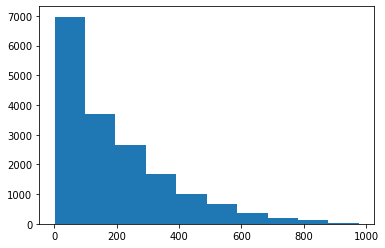

In [3]:
plt.hist(bike_rentals['cnt'])
plt.show()

In [4]:
cnt_corr = bike_rentals.corr()['cnt']
print(cnt_corr)

instant       0.278379
season        0.178056
yr            0.250495
mnth          0.120638
hr            0.394071
holiday      -0.030927
weekday       0.026900
workingday    0.030284
weathersit   -0.142426
temp          0.404772
atemp         0.400929
hum          -0.322911
windspeed     0.093234
casual        0.694564
registered    0.972151
cnt           1.000000
Name: cnt, dtype: float64


In [5]:
def assign_label(hour):
    if hour < 0:
        return 0
    elif hour <= 6:
        return 4
    elif hour <= 12:
        return 1
    elif hour <= 18:
        return 2
    elif hour <= 24:
        return 3

# **Error Metric**

I am tentatively using RMSE as the error metric for this project, since the data I am predicting is numeric and continuous.

In [6]:
time_label = bike_rentals['hr'].apply(assign_label)
bike_rentals['time_label'] = time_label

In [7]:
train = bike_rentals.sample(frac=0.8)
test = bike_rentals.loc[~bike_rentals.index.isin(train.index)]

In [8]:
excluded = ['cnt', 'casual', 'dteday', 'registered']
features = [x for x in bike_rentals.columns if not x in excluded]

In [9]:
lr = LinearRegression()
lr.fit(train[features], train['cnt'])
predictions = lr.predict(test[features])

In [10]:
mse = mean_squared_error(test['cnt'], predictions)
rmse = mse ** (1/2)
print('RMSE - linear regression model: {}'.format(rmse))

RMSE - linear regression model: 131.85271956495885


# **Linear Regression Error**

The RMSE for the Linear Regression model is comparatively high at 131.9. This may be due to a small number of extremely high rental counts, which would have a disproportionate impact on the error meric.

In [11]:
dt = DecisionTreeRegressor(min_samples_leaf = 7) #
dt.fit(train[features], train['cnt'])
predictions = dt.predict(test[features])

In [12]:
mse = mean_squared_error(test['cnt'], predictions)
rmse = mse ** (1/2)
print('RMSE - decision tree: {}'.format(rmse))

RMSE - decision tree: 50.938389699453346


# **Decision Tree Error**

The Decision Tree model, with a RMSE of 50.94, may have performed so much better than linear regression because of its ability to exploit nonlinear features.

In [13]:
rf = RandomForestRegressor(n_estimators=100) #n_estimators=100
rf.fit(train[features], train['cnt'])
predictions = rf.predict(test[features])

In [14]:
mse = mean_squared_error(test['cnt'], predictions)
rmse = mse ** (1/2)
print('RMSE - random forest: {}'.format(rmse))

RMSE - random forest: 39.40356138142466


# **Random Forest Error**

The Random Forest model perforrmed even better than the decision tree, with a RMSE of 39.4. This may be due to reduced overfitting, a benefit of random forests relative to their simpler cousin.